<a href="https://colab.research.google.com/github/am610/Fisher-Matrix/blob/master/Fisher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example to add two covariance matrix/Fisher matrix and plot the joint constraint ellipse

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.integrate import quad
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import math
from matplotlib.patches import Ellipse
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from copy import copy
import seaborn as sns

In [2]:
F1 = np.array([[ 8.5336e+00,  1.2024e+02,  7.0354e+01,  1.2474e+01],
       [ 1.2024e+02,  2.8194e+04, -6.1724e+03, -1.8008e+03],
       [ 7.0354e+01, -6.1724e+03,  2.5836e+03,  6.4775e+02],
       [ 1.2474e+01, -1.8008e+03,  6.4775e+02,  1.6758e+02]]) # # Add here

In [3]:
F1b = np.array([[ 8.5336e+00,  1.2024e+02,  7.0354e+01,  1.2474e+01],
       [ 1.2024e+02,  2.8194e+04, -6.1724e+03, -1.8008e+03],
       [ 7.0354e+01, -6.1724e+03,  2.5836e+03,  6.4775e+02],
       [ 1.2474e+01, -1.8008e+03,  6.4775e+02,  1.6758e+02]])

In [4]:
F2 = F1 + F1b

In [5]:
Cov_1 = np.linalg.pinv(F1)
C_ij_PRIOR1 = np.sqrt(np.abs(np.diag(Cov_1)))
print(C_ij_PRIOR1)

Cov_2 = np.linalg.pinv(F2)
C_ij_PRIOR2 = np.sqrt(np.abs(np.diag(Cov_2)))
print(C_ij_PRIOR2)

[1.94798479 0.07245331 0.34070154 2.01339394]
[1.37743325 0.05123222 0.24091237 1.42368451]


In [6]:
#The Marginalized [2X2] subset of COVARIANCE Matrix.
# Here Marginalized over M, omega_m


F2 = [0, -1,C_ij_PRIOR1[3]**2 ,C_ij_PRIOR1[2]**2 ,Cov_1[3][2] ]
F3 = [0, -1,C_ij_PRIOR2[3]**2 ,C_ij_PRIOR2[2]**2 ,Cov_2[3][2] ]

alpha = 1.52    # arxiv : 0906.4123. 1-s CL
print ('The Height and Width roughly is %.2f  %.2f' % (
    2*alpha*np.sqrt(F2[2]), 2*alpha*np.sqrt(F2[3])))

def a_square(sigma_x, sigma_y, sigma_xy):
    F = sigma_x + sigma_y
    G = (sigma_x - sigma_y)**2
    H = (G/4) + sigma_xy**2
    A = F/2 + np.sqrt(H)
    return A

def b_square(sigma_x, sigma_y, sigma_xy):
    F = sigma_x + sigma_y
    G = (sigma_x - sigma_y)**2
    H = (G/4) + sigma_xy**2
    B = F/2 - np.sqrt(H)
    return B

def tan_two_theta(sigma_x, sigma_y, sigma_xy):
    #print ('theta :', -math.degrees(0.5*math.atan(2*sigma_xy/(sigma_x-sigma_y))))
    return(0.5*math.atan(2*sigma_xy/(sigma_x-sigma_y)))

def area(sigma_x, sigma_y, sigma_xy):
    A = np.pi*(np.sqrt(a_square(sigma_x, sigma_y, sigma_xy))*alpha)*(np.sqrt(b_square(sigma_x, sigma_y, sigma_xy))*alpha)
    print('FOM ',np.pi/A)
    return (np.pi/A)

def par(sigma_x, sigma_y, sigma_xy):
    a_star = np.sqrt(np.abs(a_square(sigma_x, sigma_y, sigma_xy)))*2*1.52
    b_star = np.sqrt(np.abs(b_square(sigma_x, sigma_y, sigma_xy)))*2*1.52
    two_theta = tan_two_theta(sigma_x, sigma_y, sigma_xy)
    param = [a_star, b_star, two_theta]
    return param

The Height and Width roughly is 6.12  1.04


    FOM + 0.38255880657612135
    FOM  0.19127940328806062


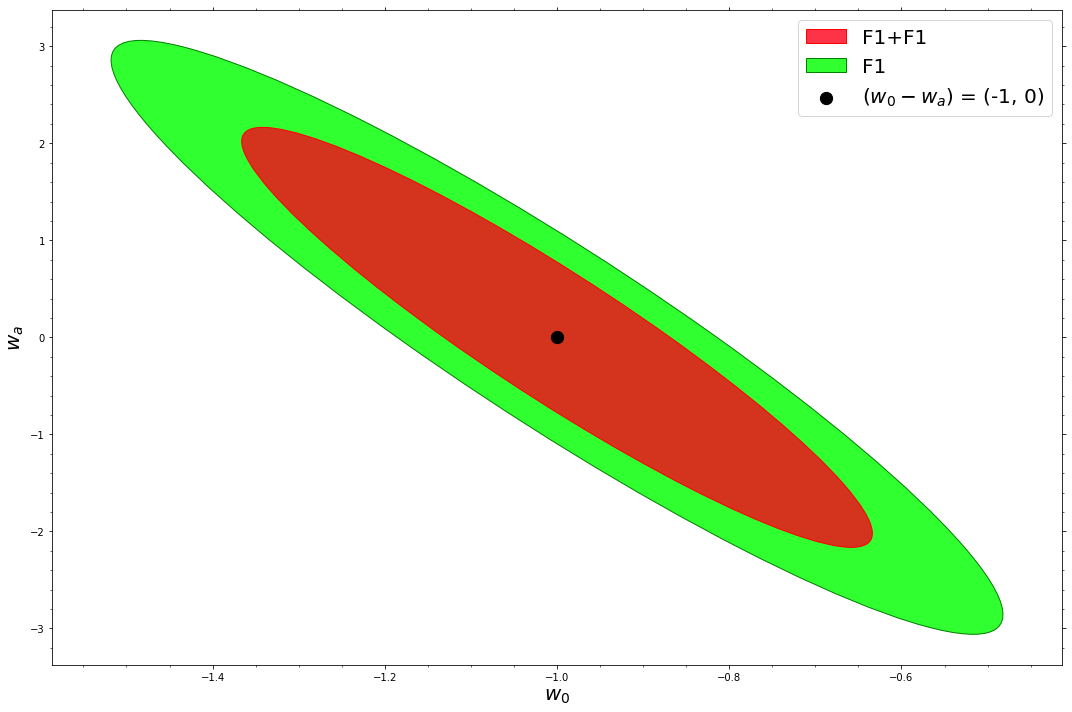

In [11]:
plt.rcParams['figure.figsize'] = [15,10] 
alpha = 1.52
params2 = par(F2[2], F2[3], F2[4])
params3 = par(F3[2], F3[3], F3[4])


ell   = mpl.patches.Ellipse(xy=[-1, 0],width=params3[1],height=params3[0],angle=-math.degrees(params3[2]), facecolor=(1,0,0.1,0.8), edgecolor='r', linewidth=1, label='F1+F1',zorder=3)
print('    FOM +',1/(params3[1]*params3[0]*2.3 ))
ell3 = mpl.patches.Ellipse(xy=[-1, 0],width=params2[1], height=params2[0], angle=-math.degrees(params2[2]), facecolor=(0.1,1,0.1,.9), edgecolor='green', label='F1')
print('    FOM ',1/(params2[1]*params2[0]*2.3 ))
#ell4 = mpl.patches.Ellipse(xy=[-1, 0],width=params_gw2_a_03[1], height=params_gw2_a_03[0], angle=-math.degrees(params_gw2_a_03[2]), facecolor='none', edgecolor='black', label='Horndeski')


fig, ax = plt.subplots()
ax.add_patch(ell)
ax.add_patch(ell3)
#ax.add_patch(ell4)
ax.set_aspect('auto')
ax.set_facecolor('none')
ax.autoscale()  # ''tight
ax.scatter(F2[1], F2[0], c='black', marker='o',s=150, label='($w_0-w_a$) = (-1, 0)',zorder=5)
ax.set_xlabel(r'$w_0$',fontsize=20)
ax.set_ylabel(r'$w_a$',fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.minorticks_on()

plt.legend(loc = 'upper right',prop={'size': 20})
plt.tight_layout()
#plt.savefig('plot3.pdf',bbox_inches='tight')